In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [2]:
#read in data set
dataset = pd.read_csv('Diabetes.csv') 

#set columns 0-7 to feature X and column 8 to output Y
X = dataset.iloc[:, 0:8].values
Y = dataset.iloc[:, 8].values 

In [3]:
#split set into training(0.8) and validations(0.2) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [4]:
#apply standardarization to the training and testing sets
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [5]:
#Apply the LogisticRegression function to training set and build model
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [6]:
#Apply the classifier model to the validation set
Y_pred = classifier.predict(X_test)

In [7]:
#calculate and output the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.7857142857142857
Precision: 0.6976744186046512
Recall: 0.6


In [8]:
#build a confusion matrix comparing predicted Y and actual Y from test sets
confusion_matrix = confusion_matrix(Y_test, Y_pred) 
confusion_matrix

array([[91, 13],
       [20, 30]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

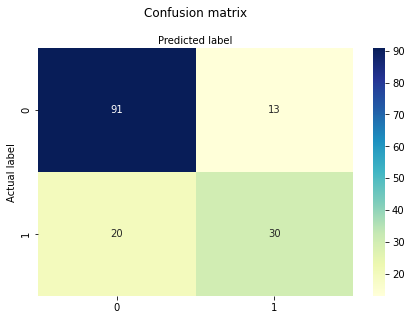

In [9]:
#plot the confusion matrix
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 